In [1]:


import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:

df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [4]:
df.shape

(5268, 13)

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values:\n{missing_values}")


Missing values:
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


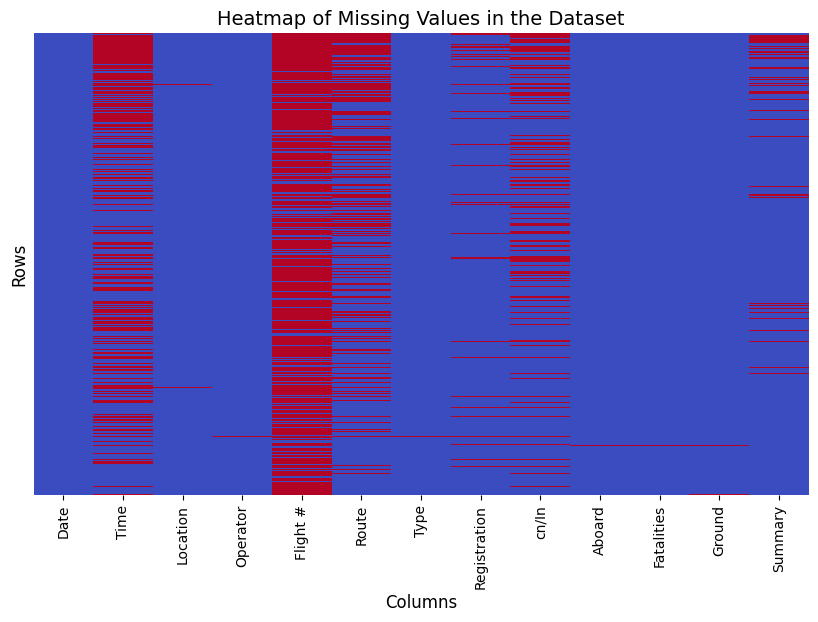

In [6]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm', yticklabels=False)

# Add labels and title
plt.title('Heatmap of Missing Values in the Dataset', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

# Show the plot
plt.show()

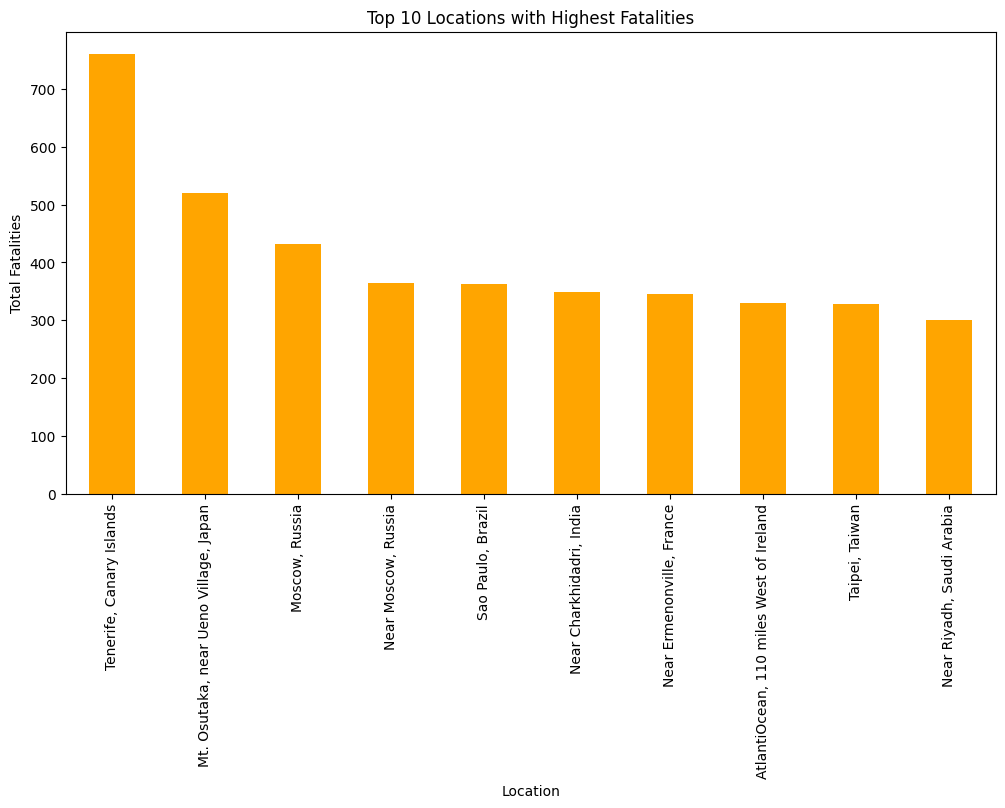

In [7]:
# # Top 10 Locations with Highest Fatalities

# Group the data by 'Location' and sum the fatalities
top_10_locations = df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 locations with the highest fatalities
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind='bar', color='orange')
plt.title('Top 10 Locations with Highest Fatalities')
plt.xlabel('Location')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.show()

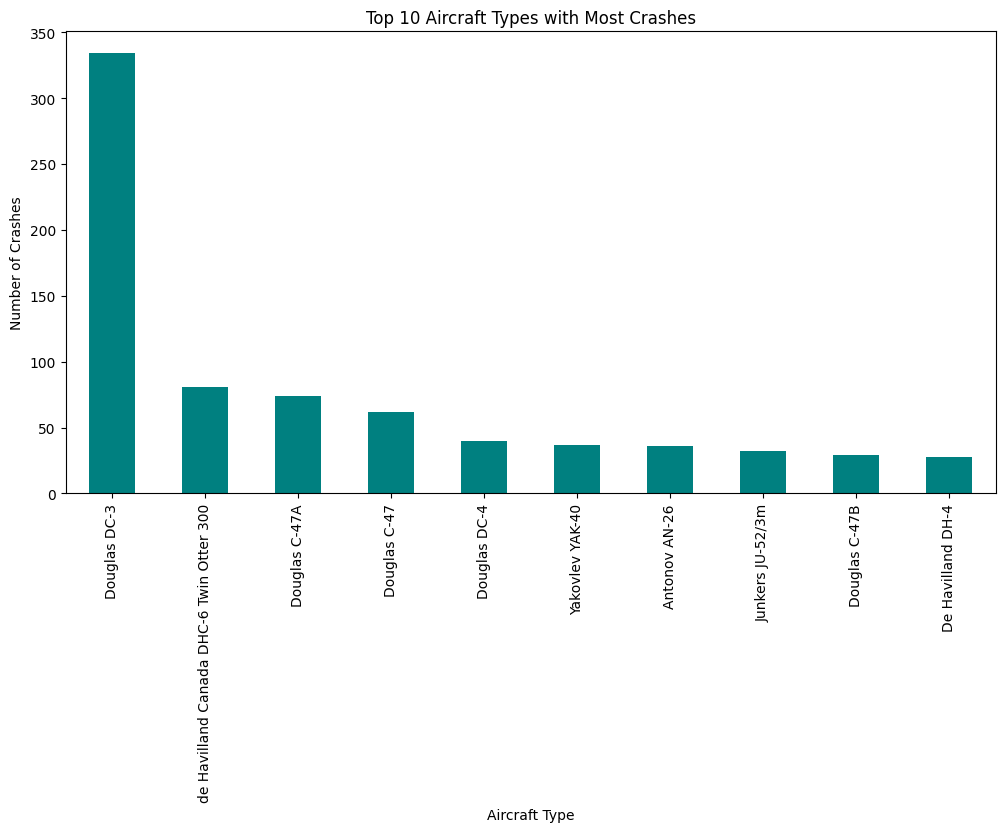

In [8]:
# # Top 10 Aircraft Types with Most Crashes

# Group by aircraft 'Type' and count the number of incidents
crashes_per_type = df['Type'].value_counts().head(10)

# Plot the top 10 aircraft types with the most crashes
plt.figure(figsize=(12, 6))
crashes_per_type.plot(kind='bar', color='teal')
plt.title('Top 10 Aircraft Types with Most Crashes')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.show()

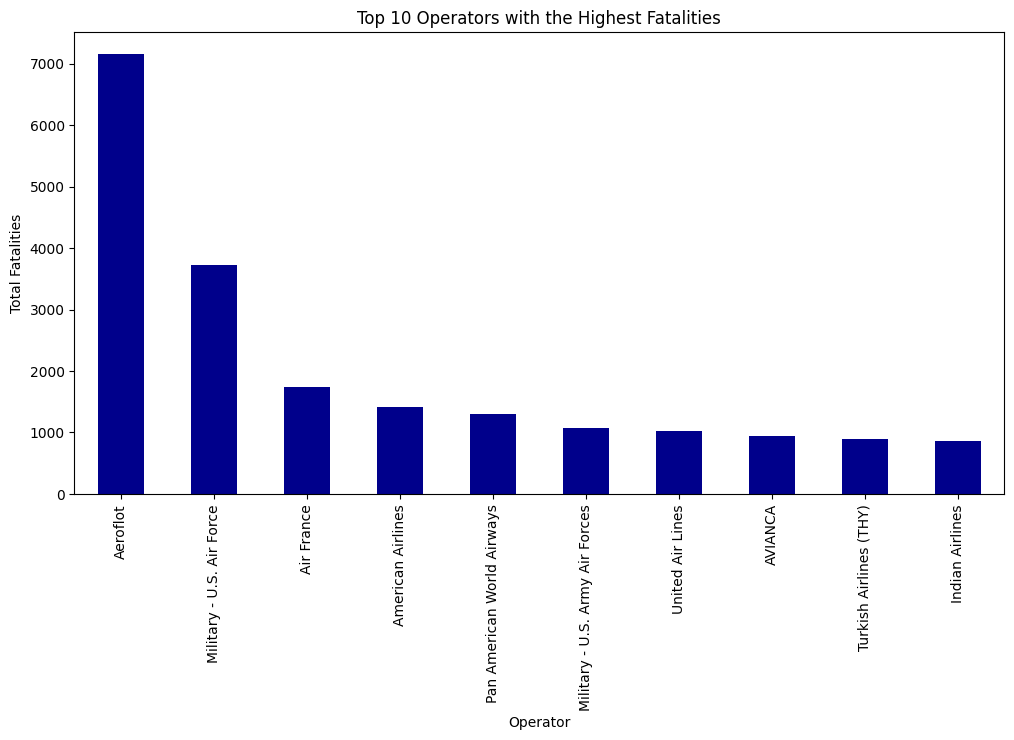

In [9]:
# Group by operator and sum the fatalities
fatalities_by_operator = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).head(10)

# Plot fatalities by operator (top 10)
plt.figure(figsize=(12, 6))
fatalities_by_operator.plot(kind='bar', color='darkblue')
plt.title('Top 10 Operators with the Highest Fatalities')
plt.xlabel('Operator')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.show()

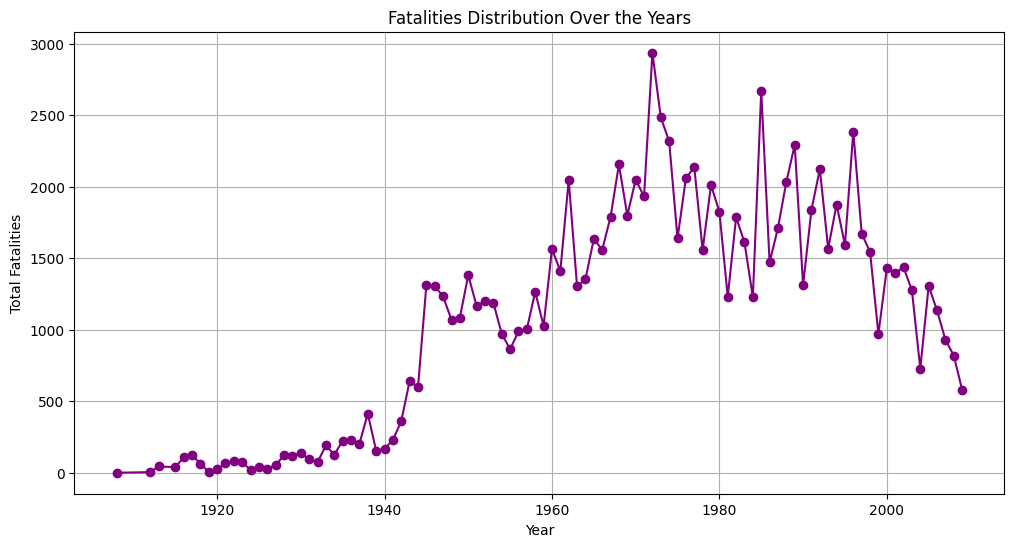

In [10]:
# # Distribution of Fatalities per Year

# Extract the year from the 'Date' column (assuming 'Date' is in MM/DD/YYYY format)
df['Year'] = pd.to_datetime(df['Date'], errors='coerce').dt.year

# Group by year and sum the fatalities
fatalities_per_year = df.groupby('Year')['Fatalities'].sum()

# Plot the distribution of fatalities over the years
plt.figure(figsize=(12, 6))
fatalities_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Fatalities Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.show()

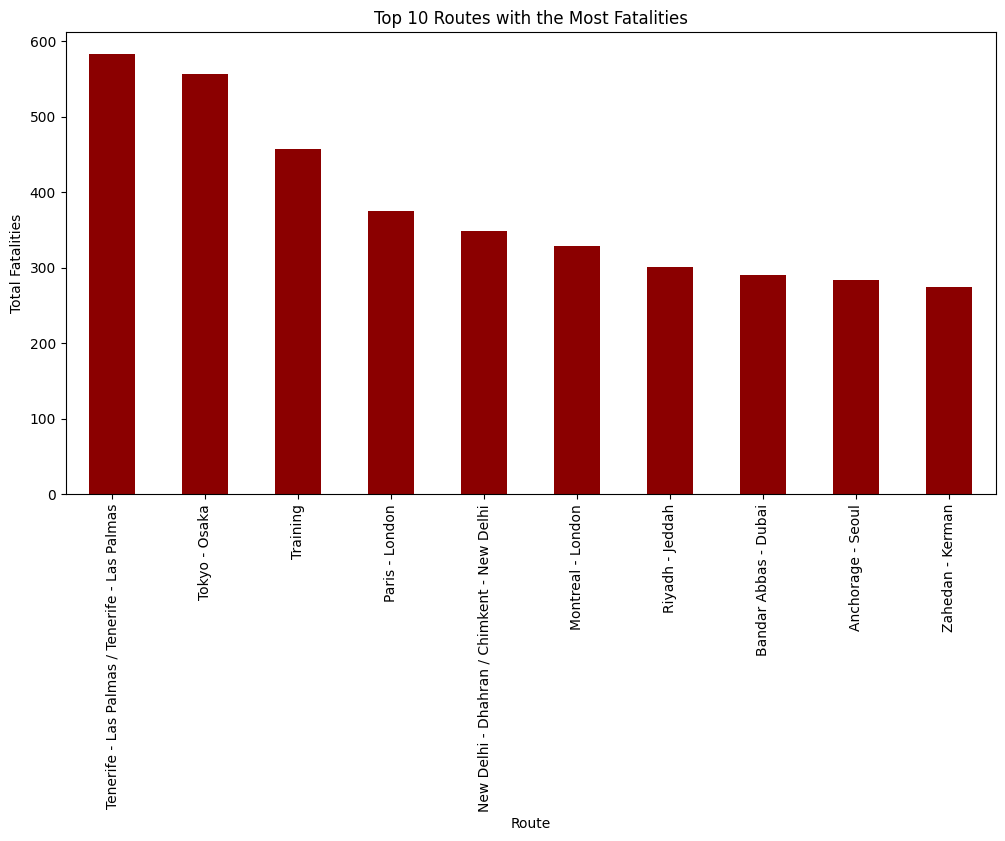

In [11]:
# # Top 10 Routes with the Most Fatalities

# Group the data by 'Route' and sum the fatalities
top_10_routes = df.groupby('Route')['Fatalities'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 routes with the highest fatalities
plt.figure(figsize=(12, 6))
top_10_routes.plot(kind='bar', color='darkred')
plt.title('Top 10 Routes with the Most Fatalities')
plt.xlabel('Route')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.show()

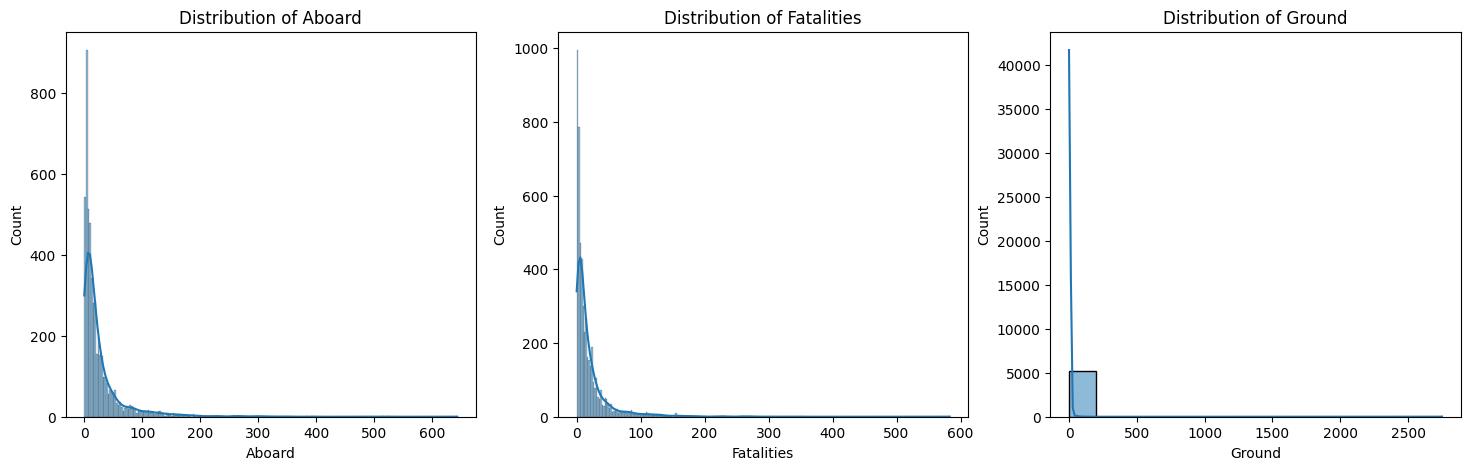

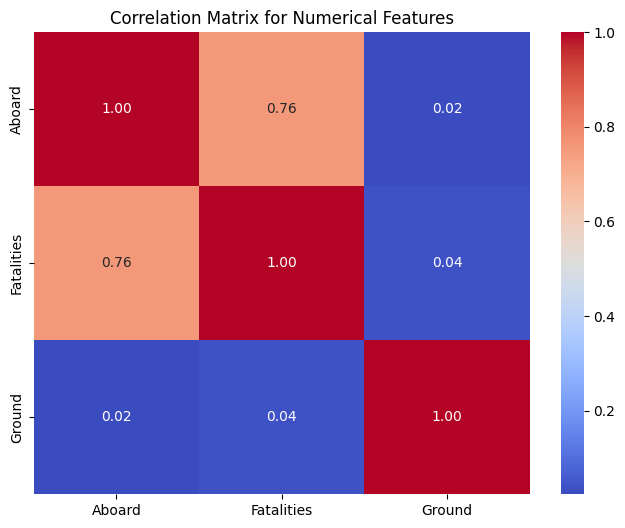

,Aboard,Fatalities,Ground
Aboard,1.000000,0.757172,0.023241
Fatalities,0.757172,1.000000,0.035170
Ground,0.023241,0.035170,1.000000


In [13]:
# Visualizing distributions of key numerical columns (Aboard, Fatalities, Ground)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Aboard'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Aboard')

sns.histplot(df['Fatalities'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Fatalities')

sns.histplot(df['Ground'].dropna(), kde=True, ax=axes[2])
axes[2].set_title('Distribution of Ground')

plt.show()

# Correlation matrix for numerical columns
correlation_matrix = df[['Aboard', 'Fatalities', 'Ground']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

correlation_matrix

In [14]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,2009
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009


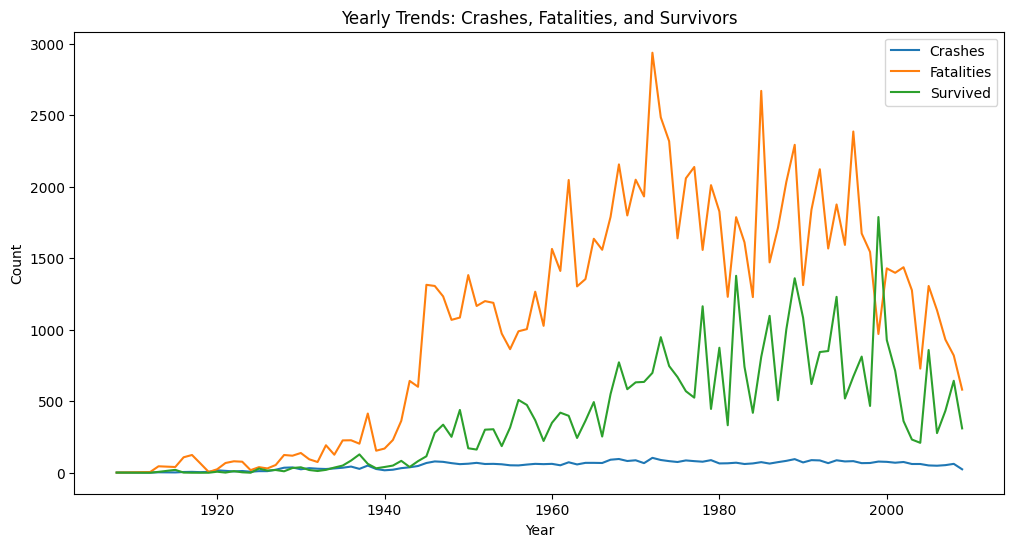

In [15]:
# Create 'Survived' column in the 'data' DataFrame
df['Survived'] = df['Aboard'] - df['Fatalities']

# Calculate yearly statistics
yearly_stats = df.groupby('Year').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Survived': 'sum',  # Now 'Survived' exists in 'data'
    'Operator': 'count'  # Count crashes
}).rename(columns={'Operator': 'Crashes'}).reset_index()
# Plot yearly crashes
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_stats, x='Year', y='Crashes', label='Crashes')
sns.lineplot(data=yearly_stats, x='Year', y='Fatalities', label='Fatalities')
sns.lineplot(data=yearly_stats, x='Year', y='Survived', label='Survived')
plt.title('Yearly Trends: Crashes, Fatalities, and Survivors')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

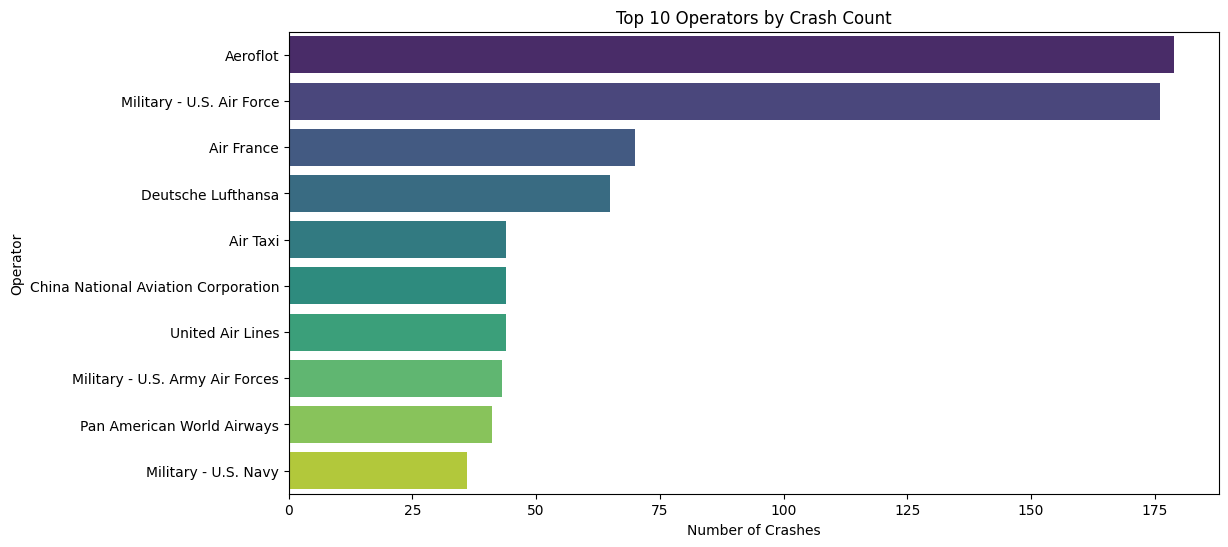

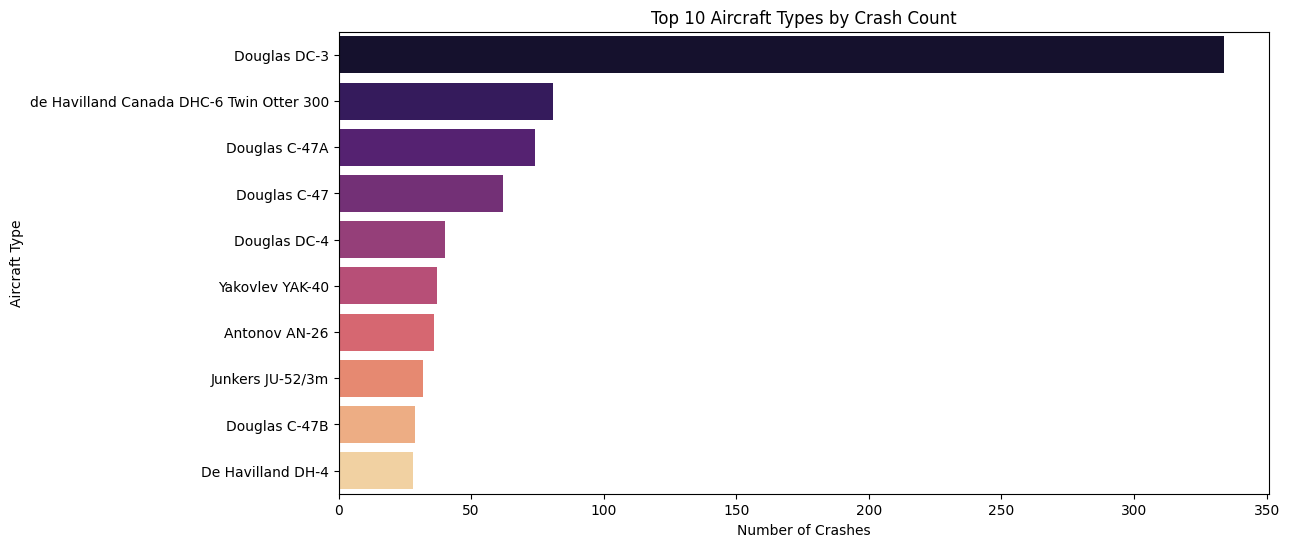

In [16]:
# 2. Highest crashes by Operator and Type
top_operators = df['Operator'].value_counts().head(10)
top_types = df['Type'].value_counts().head(10)

# Bar plot for top operators
plt.figure(figsize=(12, 6))
sns.barplot(x=top_operators.values, y=top_operators.index, palette='viridis')
plt.title('Top 10 Operators by Crash Count')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

# Bar plot for top aircraft types
plt.figure(figsize=(12, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='magma')
plt.title('Top 10 Aircraft Types by Crash Count')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.show()

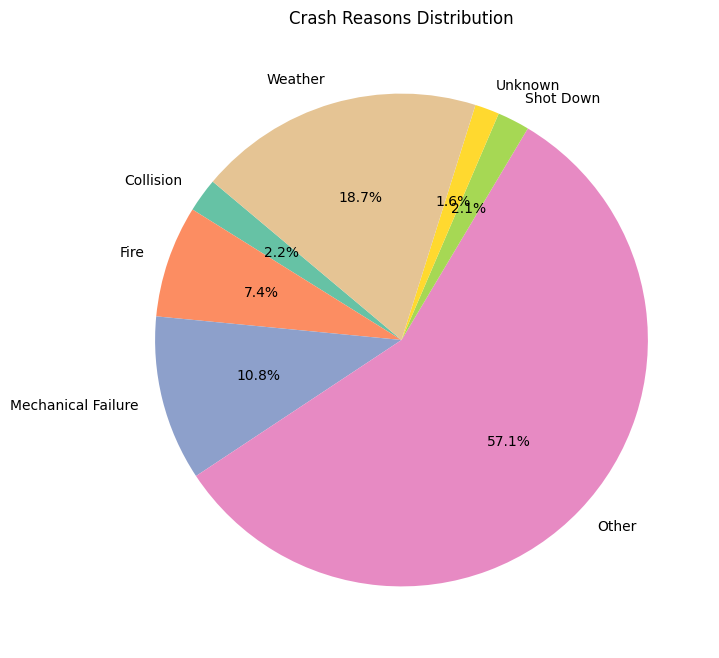

In [17]:
import re

def categorize_summary(summary):
    summary = str(summary).lower()
    if 'fire' in summary:
        return 'Fire'
    elif 'shot down' in summary or 'missile' in summary:
        return 'Shot Down'
    elif 'weather' in summary or 'storm' in summary or 'fog' in summary:
        return 'Weather'
    elif 'collision' in summary:
        return 'Collision'
    elif 'engine' in summary or 'mechanical' in summary:
        return 'Mechanical Failure'
    elif 'unknown' in summary:
        return 'Unknown'
    else:
        return 'Other'

df['Crash_Reason'] = df['Summary'].apply(categorize_summary)

# Crashes and deaths by category
reason_stats = df.groupby('Crash_Reason').agg({
    'Operator': 'count',  # Number of crashes
    'Fatalities': 'sum'
}).rename(columns={'Operator': 'Crashes'}).reset_index()

# Pie chart for crash reasons
plt.figure(figsize=(8, 8))
plt.pie(reason_stats['Crashes'], labels=reason_stats['Crash_Reason'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Crash Reasons Distribution')
plt.show()

In [18]:
yearly_stats.head(), reason_stats

(   Year  Aboard  Fatalities  Survived  Crashes
 0  1908     2.0         1.0       1.0        1
 1  1912     5.0         5.0       0.0        1
 2  1913    51.0        45.0       6.0        3
 3  1915    60.0        40.0      20.0        2
 4  1916   109.0       108.0       1.0        5,
          Crash_Reason  Crashes  Fatalities
 0           Collision      117      3977.0
 1                Fire      386     11762.0
 2  Mechanical Failure      569     10569.0
 3               Other     2999     52689.0
 4           Shot Down      111      3639.0
 5             Unknown       84      2308.0
 6             Weather      984     20535.0)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [21]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_columns = ['Operator', 'Location', 'Type']

# Define the OneHotEncoder transformer for categorical columns
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Combine preprocessing steps using ColumnTransformer (only for categorical data)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply the transformations
processed_data = preprocessor.fit_transform(df)

# Get feature names for the one-hot encoded columns
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Create DataFrame for the transformed data
processed_data_df = pd.DataFrame(processed_data, columns=encoded_cat_columns)

# Display the processed data
print("Original Data:")
print(df.head())
print("\nProcessed Data:")
print(processed_data_df.head())


Original Data:
         Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2    

In [22]:
# Combine numerical features with encoded categorical data
numerical_data = df[['Aboard', 'Fatalities', 'Ground', 'Year']].reset_index(drop=True)
full_data = pd.concat([numerical_data, processed_data_df], axis=1)
full_data


,Aboard,Fatalities,Ground,Year,Operator_AB Aerotransport,Operator_ACES Colombia,Operator_ADC Airlines,Operator_ADES Colombia,Operator_AECA Cargo,Operator_AIDA,...,Type_de Havilland DHC-6 Twin Otter 300,Type_de Havilland DHC-6-200,Type_de Havilland Dash-2 Beaver,Type_de Havilland Dash-2 float plane,Type_de Havilland Dove 1,Type_de Havilland Dragon 1,Type_de Havilland RU-6A Beaver /Bell UH-1H,Type_de havilland Canada Twin Otter 200,Type_deHavilland DH-86,Type_nan
0,2.0,1.0,0.0,1908,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.0,5.0,0.0,1912,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,14.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,30.0,0.0,1913,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,112.0,98.0,2.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5264,4.0,4.0,NaN,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,228.0,228.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5266,1.0,1.0,0.0,2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA for all data

In [25]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Assuming 'data' is your original DataFrame
# Identify categorical columns
categorical_columns = ['Operator', 'Location', 'Type']

# Define the OneHotEncoder transformer for categorical columns
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Combine preprocessing steps using ColumnTransformer (only for categorical data)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Apply the transformations
processed_data = preprocessor.fit_transform(df)

# Get feature names for the one-hot encoded columns
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Create DataFrame for the transformed data

processed_data_df = pd.DataFrame(processed_data, columns=encoded_cat_columns)

# Combine numerical features with encoded categorical data
numerical_data = df[['Aboard', 'Fatalities', 'Ground', 'Year']].reset_index(drop=True)


## PCA and DBSCAN on Principal components (Numerical data):

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for scatterplot

# ... (previous code) ...

# Preprocessing: Combining numerical and encoded categorical features
# Numerical features
numerical_features = ['Aboard', 'Fatalities', 'Ground', 'Survived']
numerical_data = df[numerical_features]

# Impute missing values using SimpleImputer before scaling
imputer = SimpleImputer(strategy='mean') # You can choose a different imputation strategy
numerical_data = pd.DataFrame(imputer.fit_transform(numerical_data), columns=numerical_features)

# Scaling the numerical data for uniformity
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Including principal components from PCA for clustering
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_numerical_data)

# ... (rest of the code) ...


## DBSCAN on whole data (No PCA)

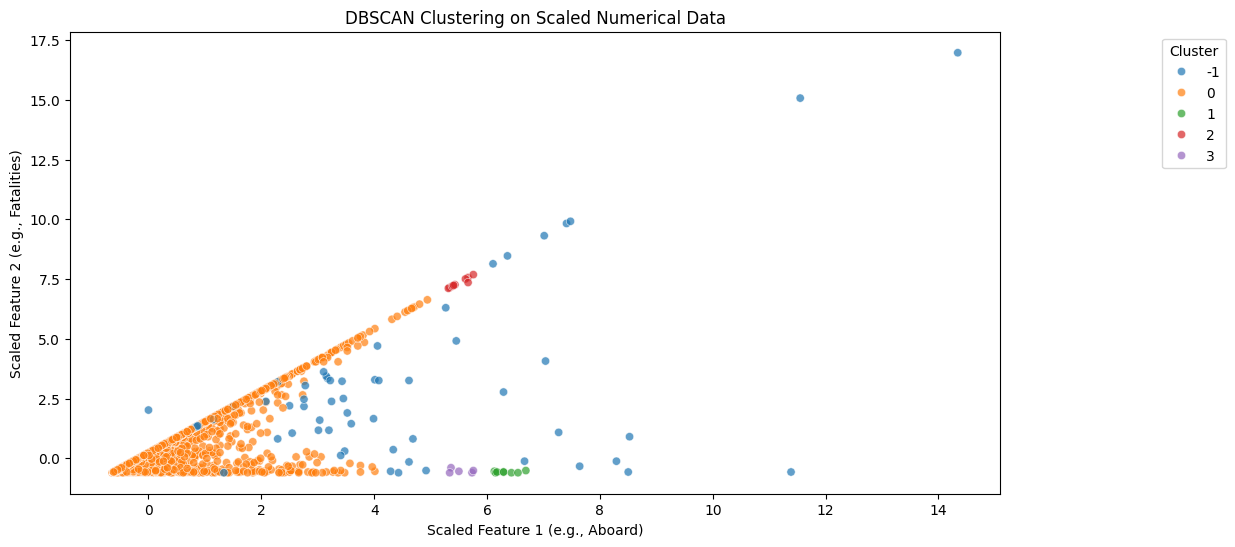

,Cluster_NoPCA,Number of Points
0,0,5184
1,-1,62
2,2,9
3,1,8
4,3,5


In [30]:
# Scaling the numerical data for DBSCAN directly (no PCA)
scaled_data = scaler.fit_transform(numerical_data)

# Running DBSCAN clustering on scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters can be tuned based on data density
dbscan_labels = dbscan.fit_predict(scaled_data)

# Adding DBSCAN labels to the original data
df['Cluster_NoPCA'] = dbscan_labels

# Visualizing DBSCAN clusters with numerical features
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    alpha=0.7
)
plt.title('DBSCAN Clustering on Scaled Numerical Data')
plt.xlabel('Scaled Feature 1 (e.g., Aboard)')
plt.ylabel('Scaled Feature 2 (e.g., Fatalities)')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

# Summary of clusters
cluster_summary = df['Cluster_NoPCA'].value_counts().reset_index()
cluster_summary.columns = ['Cluster_NoPCA', 'Number of Points']
cluster_summary


In [31]:
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Survived,Crash_Reason,Cluster_NoPCA
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0,Other,0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,0.0,Other,0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,0.0,Weather,0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,6.0,Weather,0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,0.0,Mechanical Failure,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,14.0,Other,0
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,2009,0.0,Other,0
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,0.0,Weather,0
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,0.0,Weather,0


In [32]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Filtering out noise points labeled as -1 for evaluation
def filter_noise(df, labels):
    """Filters out noise points (DBSCAN label -1) and returns filtered data and labels."""
    filtered_data = df[labels != -1]
    filtered_labels = labels[labels != -1]
    return filtered_data, filtered_labels

# For PCA-based clustering
filtered_pca_data, filtered_pca_labels = filter_noise(pca_features, dbscan_labels)

if len(set(filtered_pca_labels)) > 1:  # Ensure at least two clusters for evaluation
    silhouette_pca = silhouette_score(filtered_pca_data, filtered_pca_labels)
    calinski_harabasz_pca = calinski_harabasz_score(filtered_pca_data, filtered_pca_labels)
    davies_bouldin_pca = davies_bouldin_score(filtered_pca_data, filtered_pca_labels)

    print("Evaluation Metrics for PCA-based Clustering:")
    print(f"Silhouette Score: {silhouette_pca}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_pca}")
    print(f"Davies-Bouldin Index: {davies_bouldin_pca}")
else:
    print("PCA-based clustering has fewer than 2 clusters. Metrics cannot be calculated.")

# For directly scaled numerical features
filtered_scaled_data, filtered_scaled_labels = filter_noise(scaled_data, dbscan_labels)

if len(set(filtered_scaled_labels)) > 1:  # Ensure at least two clusters for evaluation
    silhouette_scaled = silhouette_score(filtered_scaled_data, filtered_scaled_labels)
    calinski_harabasz_scaled = calinski_harabasz_score(filtered_scaled_data, filtered_scaled_labels)
    davies_bouldin_scaled = davies_bouldin_score(filtered_scaled_data, filtered_scaled_labels)

    print("\nEvaluation Metrics for Directly Scaled Numerical Data Clustering:")
    print(f"Silhouette Score: {silhouette_scaled}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz_scaled}")
    print(f"Davies-Bouldin Index: {davies_bouldin_scaled}")
else:
    print("\nDirectly scaled clustering has fewer than 2 clusters. Metrics cannot be calculated.")


Evaluation Metrics for PCA-based Clustering:
Silhouette Score: 0.8543878732827878
Calinski-Harabasz Index: 507.8128057491014
Davies-Bouldin Index: 0.26896290120299116

Evaluation Metrics for Directly Scaled Numerical Data Clustering:
Silhouette Score: 0.853047815824097
Calinski-Harabasz Index: 512.3043044021575
Davies-Bouldin Index: 0.2702238112478416


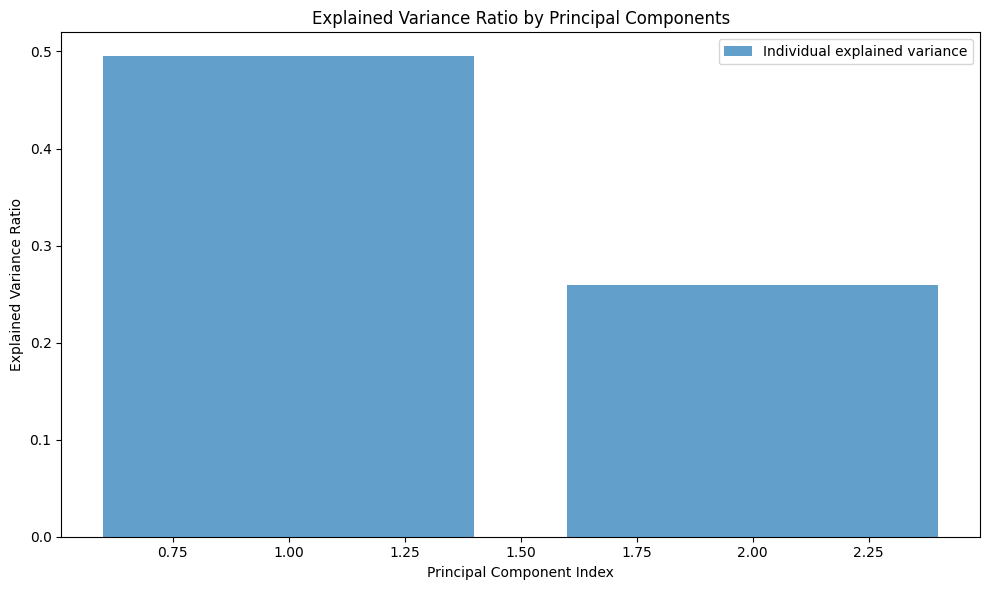

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming PCA has already been performed and the PCA object is available as `pca`
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


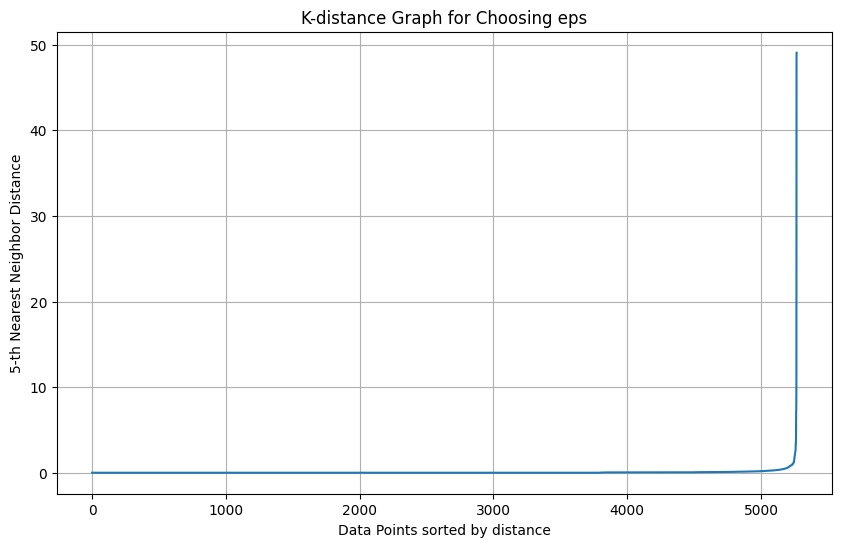

In [34]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Compute the k-nearest neighbors for all points
k = 5  # Usually set to `min_samples`
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_data)  # Use the scaled data for consistency
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Sort and plot the distances
distances = np.sort(distances[:, k-1], axis=0)  # Get the k-th nearest neighbor distances
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('K-distance Graph for Choosing eps')
plt.grid(True)
plt.show()


In [35]:
from sklearn.metrics import silhouette_score

# Grid search for eps and min_samples
eps_values = np.linspace(0.1, 1.0, 10)  # Test a range of eps values
min_samples_values = range(3, 10)  # Test different min_samples values

best_params = {}
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(scaled_data)

        # Filter noise points (-1) for metrics calculation
        filtered_data, filtered_labels = filter_noise(scaled_data, labels)

        if len(set(filtered_labels)) > 1:  # Ensure valid clustering
            score = silhouette_score(filtered_data, filtered_labels)
            if score > best_silhouette:
                best_silhouette = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best Parameters: {best_params}, Best Silhouette Score: {best_silhouette}")


Best Parameters: {'eps': 0.7000000000000001, 'min_samples': 9}, Best Silhouette Score: 0.8963103986623768


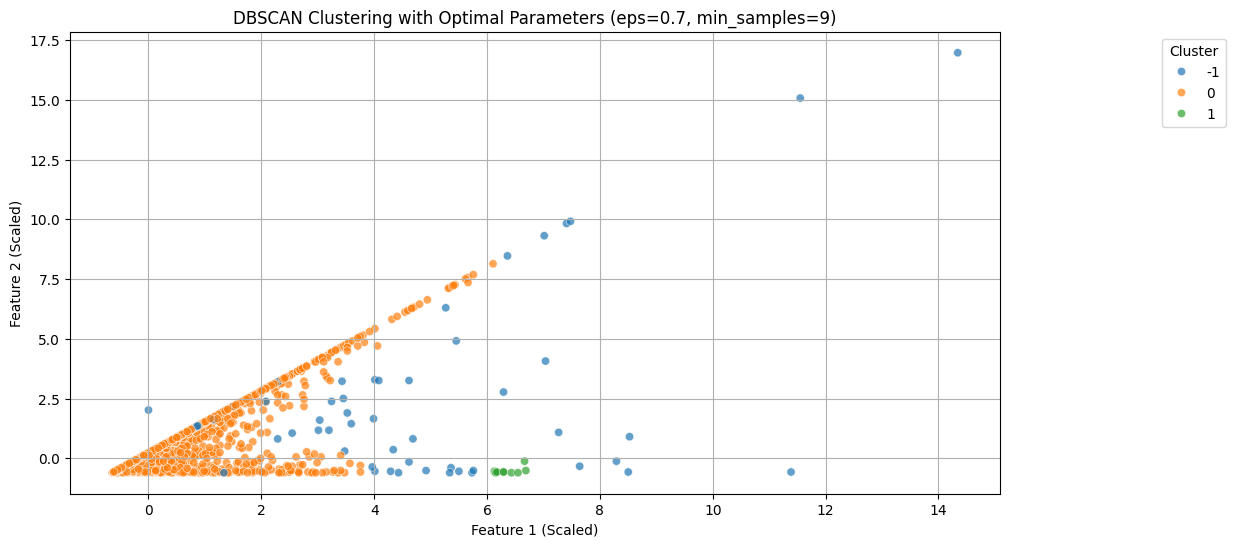


Cluster Summary:
   Cluster  Number of Points
0        0              5205
1       -1                54
2        1                 9

Number of noise points: 54


In [36]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Perform DBSCAN clustering with optimal parameters
dbscan = DBSCAN(eps=0.7, min_samples=9)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the data for analysis
df['Optimal_DBSCAN_Cluster'] = dbscan_labels

# Visualize the clusters (for 2D data or reduced dimensions, such as PCA)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=dbscan_labels,
    palette='tab10',
    alpha=0.7
)
plt.title('DBSCAN Clustering with Optimal Parameters (eps=0.7, min_samples=9)')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()

# Summary of clusters
cluster_summary = df['Optimal_DBSCAN_Cluster'].value_counts().reset_index()
cluster_summary.columns = ['Cluster', 'Number of Points']
print("\nCluster Summary:")
print(cluster_summary)

# Analyze the noise points (-1 cluster label)
noise_points = df[df['Optimal_DBSCAN_Cluster'] == -1]
print(f"\nNumber of noise points: {len(noise_points)}")


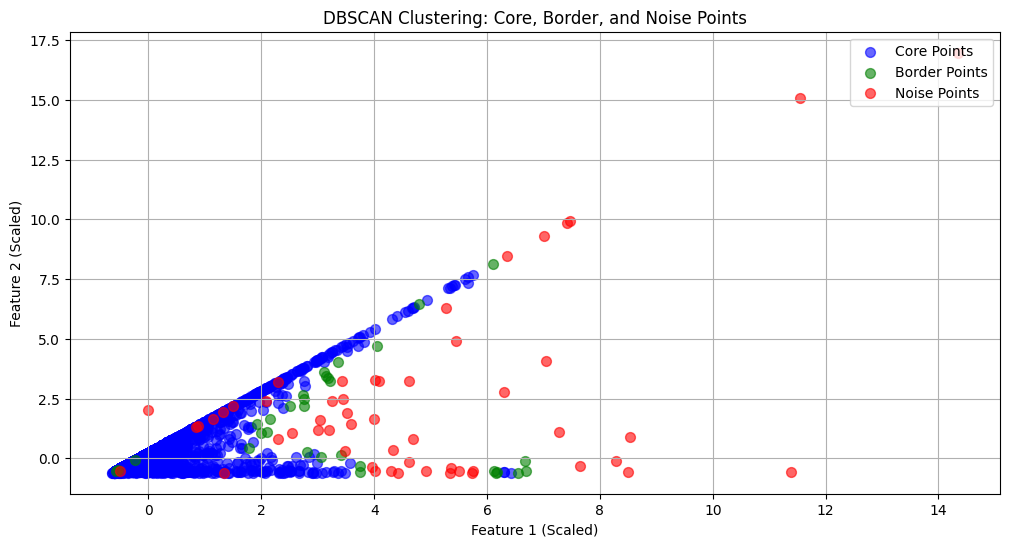

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# DBSCAN with optimal parameters
dbscan = DBSCAN(eps=0.7, min_samples=9)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Extract core samples, border points, and noise points
core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True  # Mark core points

# Classify points
core_points = (core_samples_mask & (dbscan_labels != -1))  # Core points in clusters
border_points = (~core_samples_mask & (dbscan_labels != -1))  # Border points in clusters
noise_points = (dbscan_labels == -1)  # Noise points

# Visualization
plt.figure(figsize=(12, 6))

# Core points
plt.scatter(scaled_data[core_points, 0], scaled_data[core_points, 1],
            c='blue', label='Core Points', alpha=0.6, s=50)

# Border points
plt.scatter(scaled_data[border_points, 0], scaled_data[border_points, 1],
            c='green', label='Border Points', alpha=0.6, s=50)

# Noise points
plt.scatter(scaled_data[noise_points, 0], scaled_data[noise_points, 1],
            c='red', label='Noise Points', alpha=0.6, s=50)

plt.title('DBSCAN Clustering: Core, Border, and Noise Points')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [38]:
import pickle
from sklearn.cluster import DBSCAN

# Assuming your DBSCAN model is already trained
dbscan = DBSCAN(eps=0.7, min_samples=9)
dbscan.fit(scaled_data)  # Fit on the scaled dataset

# Save the model to a pickle file
with open('dbscan_model.pkl', 'wb') as file:
    pickle.dump(dbscan, file)

print("dbscan_model.pkl")


dbscan_model.pkl


In [39]:
#predictions
# Load the model from the pickle file
with open('dbscan_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

# Use the loaded model for predictions
dbscan_labels = loaded_model.fit_predict(scaled_data)
print("DBSCAN labels predicted using the loaded model.")

Model loaded successfully
DBSCAN labels predicted using the loaded model.
